# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import sys
sys.path.append("../src")

from config import url, file_name
from data.load_data import get_data
from data.clean_data import dataset_cleaned

# load row data
df = get_data(url, file_name)

# cleaned subset of the data
cdf = dataset_cleaned(df)

In [2]:
# add a new feature
# number of programming, scripting, and markup languages have you done extensive development work in over the past year

cdf["NLanguageHaveWorkedWith"] = cdf.LanguageHaveWorkedWith.str.split(";").apply(lambda x: len(x) if x==x else np.nan)

In [3]:
cdf["NLanguageHaveWorkedWith"].value_counts(dropna=False).sort_values(ascending=False)

4.0     7782
5.0     7362
3.0     7040
6.0     5908
2.0     4795
7.0     4226
8.0     2894
1.0     2623
9.0     1869
10.0    1159
11.0     751
12.0     494
13.0     300
14.0     201
15.0     141
NaN      136
16.0      98
18.0      49
17.0      41
19.0      27
20.0      24
21.0      10
25.0       8
23.0       8
22.0       7
24.0       4
51.0       3
29.0       2
28.0       1
46.0       1
43.0       1
35.0       1
27.0       1
44.0       1
47.0       1
41.0       1
26.0       1
33.0       1
36.0       1
34.0       1
32.0       1
Name: NLanguageHaveWorkedWith, dtype: int64

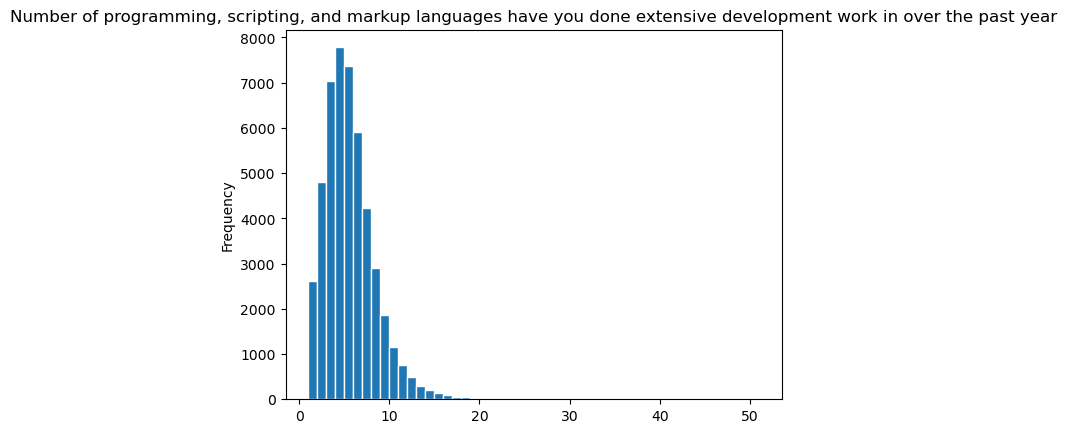

In [4]:
# number of programming, scripting, and markup languages have you done extensive development work in over the past year

cdf.NLanguageHaveWorkedWith.plot.hist(bins=50, 
                                      edgecolor='w',
                                      title="Number of programming, scripting, and markup languages have you done extensive development work in over the past year",
                                    );

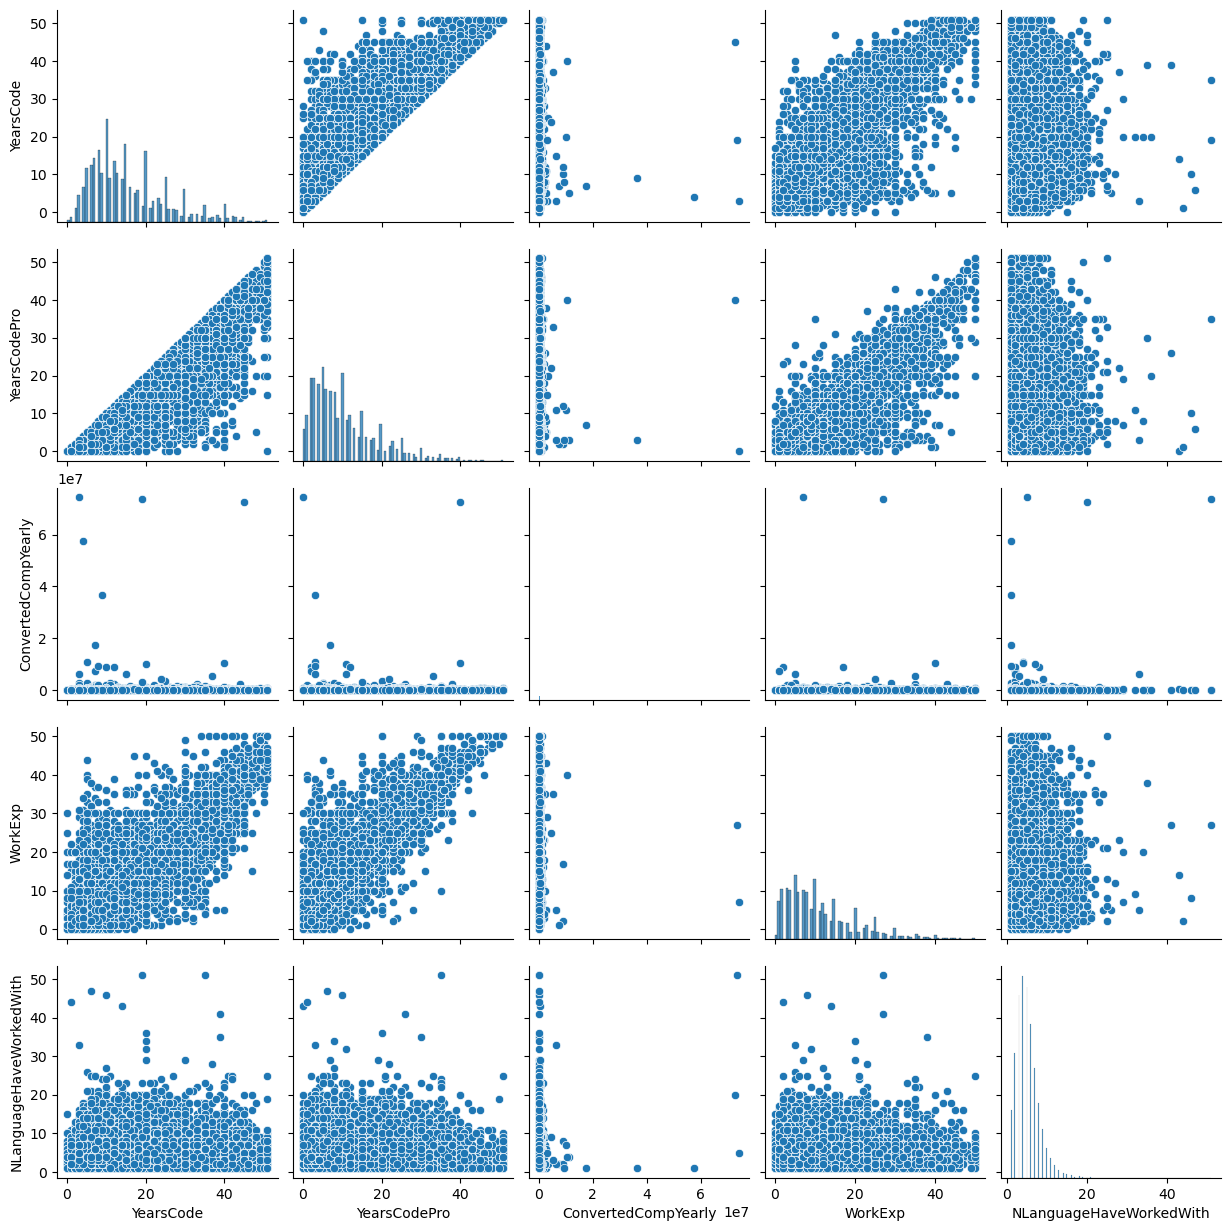

In [5]:
sns.pairplot(cdf);

In [6]:
cdf.corr()

,YearsCode,YearsCodePro,ConvertedCompYearly,WorkExp,NLanguageHaveWorkedWith
YearsCode,1.000000,0.917811,0.035634,0.867433,0.054798
YearsCodePro,0.917811,1.000000,0.049573,0.930415,0.029609
ConvertedCompYearly,0.035634,0.049573,1.000000,0.047618,0.049261
WorkExp,0.867433,0.930415,0.047618,1.000000,0.032085
NLanguageHaveWorkedWith,0.054798,0.029609,0.049261,0.032085,1.000000


In [7]:
# `YearsCode`,`YearsCodePro`,`WorkExp` are correlated
# How many NAs does contain each of them?

cdf[["YearsCode", "YearsCodePro", "WorkExp"]].isna().sum(axis=0)

YearsCode         151
YearsCodePro      708
WorkExp         15446
dtype: int64

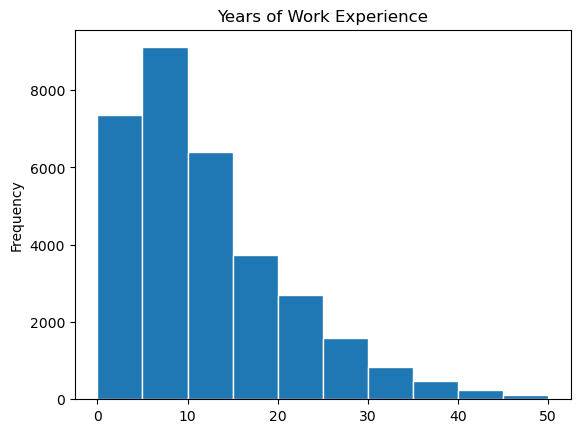

In [8]:
cdf.WorkExp.plot.hist(bins=10, 
                      edgecolor='w',
                     title="Years of Work Experience");

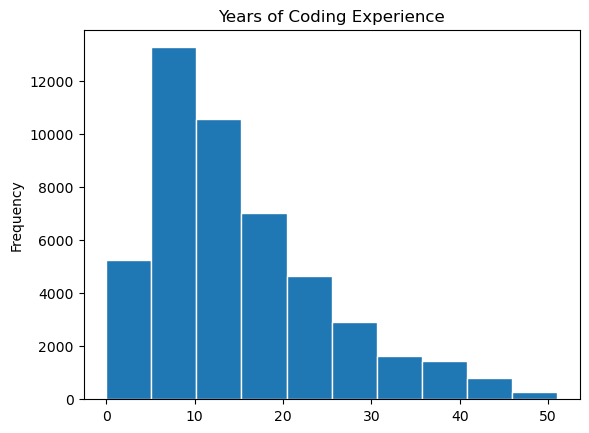

In [9]:
cdf.YearsCode.plot.hist(bins=10, 
                      edgecolor='w',
                     title="Years of Coding Experience");

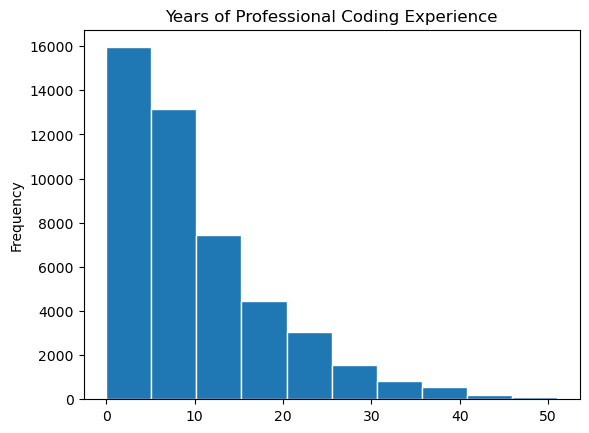

In [10]:
cdf.YearsCodePro.plot.hist(bins=10, 
                      edgecolor='w',
                     title="Years of Professional Coding Experience");

In [11]:
# popularity of programming, scripting, and markup languages have you done extensive development work in over the past year

(cdf.LanguageHaveWorkedWith.str.get_dummies(";").mean(axis=0, skipna=False)*100).sort_values(ascending=False)

JavaScript                 64.110474
SQL                        51.760292
HTML/CSS                   51.364252
Python                     45.063054
TypeScript                 42.807712
Bash/Shell (all shells)    34.215737
C#                         28.437728
Java                       27.297551
PHP                        17.725899
C++                        17.088067
PowerShell                 14.532569
Go                         14.403335
C                          13.448671
Rust                       11.276707
Kotlin                      9.106826
Ruby                        7.387181
Dart                        5.113080
Lua                         4.819177
Swift                       4.769151
Groovy                      4.177176
Visual Basic (.Net)         3.858260
R                           3.451798
VBA                         3.376759
Scala                       3.266285
Assembly                    3.243356
Delphi                      2.799375
Elixir                      2.680563
M

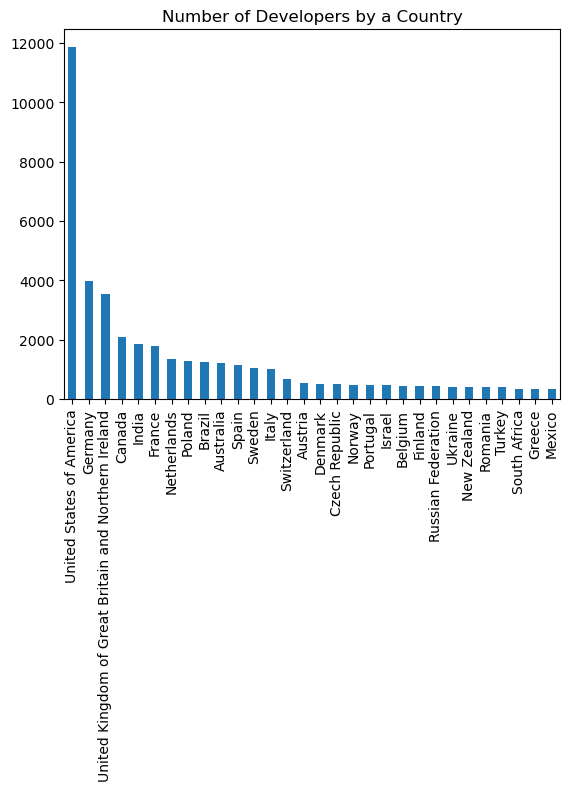

In [12]:
# number of developers by a country
cdf.Country.value_counts().iloc[:30].plot.bar(title="Number of Developers by a Country");

In [13]:
# number of developers by a country

cdf.Country.value_counts().iloc[:60]

United States of America                                11865
Germany                                                  3966
United Kingdom of Great Britain and Northern Ireland     3540
Canada                                                   2105
India                                                    1868
France                                                   1801
Netherlands                                              1361
Poland                                                   1266
Brazil                                                   1252
Australia                                                1209
Spain                                                    1149
Sweden                                                   1055
Italy                                                    1012
Switzerland                                               661
Austria                                                   531
Denmark                                                   516
Czech Re

In [18]:
cdf.DevType.value_counts(dropna=False)

Developer, full-stack                            17060
Developer, back-end                               9556
Developer, front-end                              3271
Developer, desktop or enterprise applications     2435
Developer, mobile                                 1646
Other (please specify):                           1493
Engineering manager                               1311
Developer, embedded applications or devices       1267
Data scientist or machine learning specialist      992
DevOps specialist                                  982
Engineer, data                                     904
Research & Development role                        827
Senior Executive (C-Suite, VP, etc.)               776
Cloud infrastructure engineer                      766
Academic researcher                                615
Developer, game or graphics                        491
Data or business analyst                           450
Developer, QA or test                              360
System adm

In [20]:
cdf.DevType.unique().shape

(34,)